In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import keras
import keras.backend as K
from keras.layers.core import Activation
from keras.layers import Dense , LSTM, Dropout
from keras.models import Sequential, load_model
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm

# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0

In [ ]:
fd_001_train = pd.read_csv("C:/Users/sbava/Downloads/CMAPSSData (1)/train_FD001.txt",sep=" ",header=None)

In [ ]:
fd_001_test = pd.read_csv("C:/Users/sbava/Downloads/CMAPSSData (1)/test_FD001.txt",sep=" ",header=None)

In [ ]:
fd_001_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [ ]:
fd_001_train.drop(columns=[26,27],inplace=True)

In [ ]:
fd_001_test.drop(columns=[26,27],inplace=True)

In [ ]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

In [ ]:
fd_001_train.columns = columns

In [ ]:
fd_001_test.columns = columns

In [ ]:
#initial acquaintance with data
fd_001_train.describe()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
#delete columns with constant values ​​that do not carry information about the state of the unit
fd_001_train.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

In [ ]:
#function for preparing training data and forming a RUL column with information about the remaining
# before breaking cycles
def prepare_train_data(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    fd_RUL = pd.DataFrame(fd_RUL)
    fd_RUL.columns = ['unit_number','max']
    df = df.merge(fd_RUL, on=['unit_number'], how='left')
    df['RUL'] = df['max'] - df['time_in_cycles']
    df.drop(columns=['max'],inplace = True)
    
    return df[df['time_in_cycles'] > factor]


In [ ]:
df = prepare_train_data(fd_001_train)

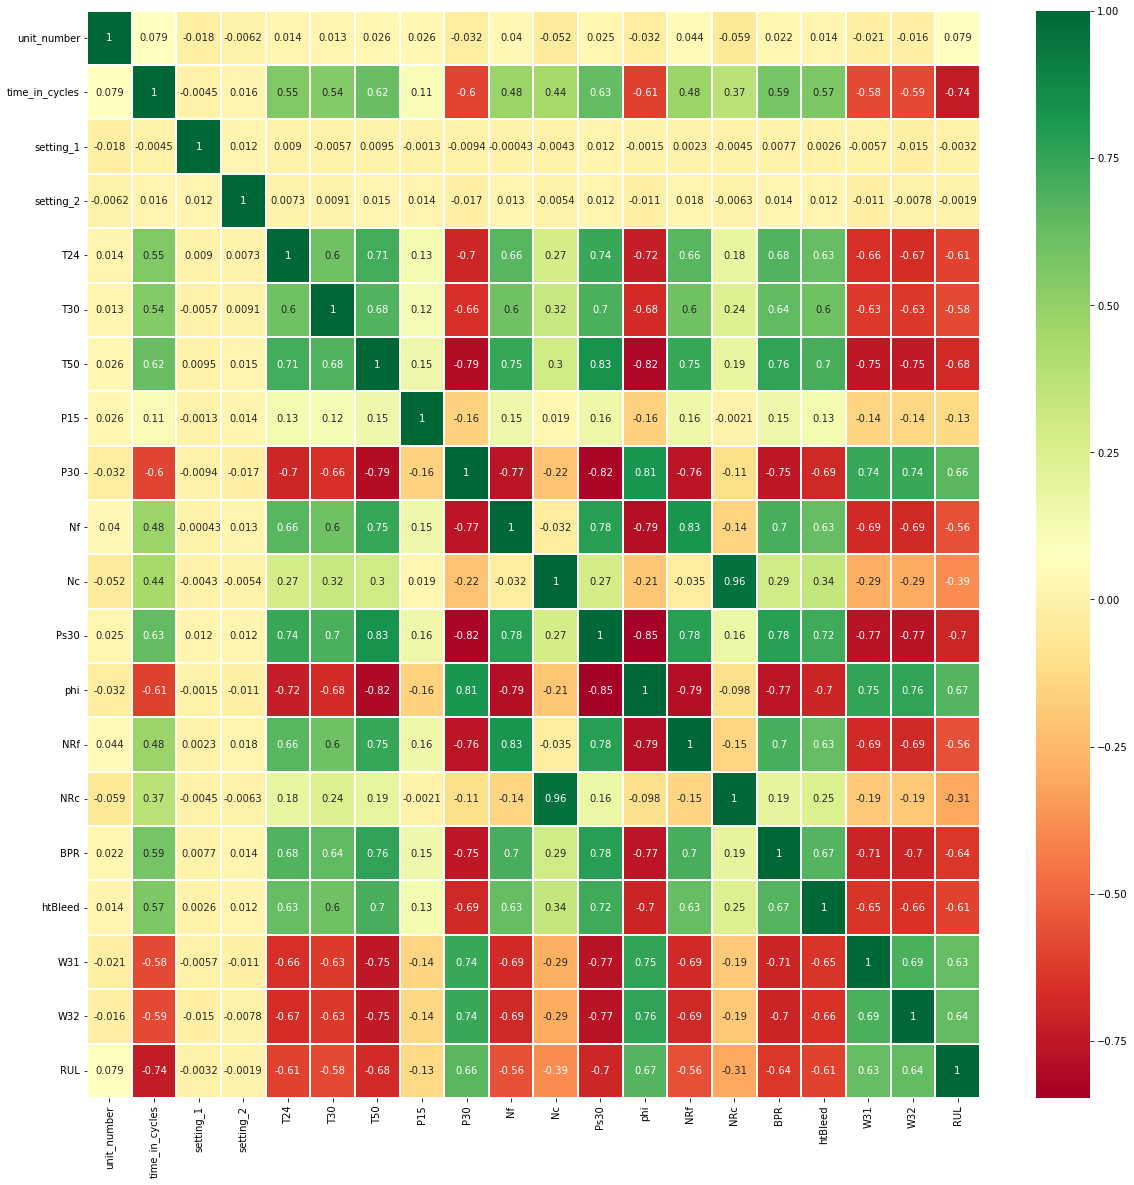

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [ ]:
df

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [ ]:
fd_001_test

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [ ]:
columns=["id","cycle","op1","op2","op3",'TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32',"sensor23"]

In [ ]:
train=pd.read_csv("C:/Users/sbava/Downloads/CMAPSSData (1)/train_FD001.txt",sep=" ",names=columns)
test=pd.read_csv("C:/Users/sbava/Downloads/CMAPSSData (1)/test_FD001.txt",sep=" ",names=columns)
test_results=pd.read_csv("C:/Users/sbava/Downloads/CMAPSSData (1)/RUL_FD001.txt",sep=" ",header=None)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   op1        20631 non-null  float64
 3   op2        20631 non-null  float64
 4   op3        20631 non-null  float64
 5   TRA        20631 non-null  float64
 6   T2         20631 non-null  float64
 7   T24        20631 non-null  float64
 8   T30        20631 non-null  float64
 9   T50        20631 non-null  float64
 10  P2         20631 non-null  float64
 11  P15        20631 non-null  float64
 12  P30        20631 non-null  float64
 13  Nf         20631 non-null  float64
 14  Nc         20631 non-null  float64
 15  epr        20631 non-null  float64
 16  Ps30       20631 non-null  float64
 17  phi        20631 non-null  float64
 18  NRf        20631 non-null  float64
 19  NRc        20631 non-null  float64
 20  BPR   

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         13096 non-null  int64  
 1   cycle      13096 non-null  int64  
 2   op1        13096 non-null  float64
 3   op2        13096 non-null  float64
 4   op3        13096 non-null  float64
 5   TRA        13096 non-null  float64
 6   T2         13096 non-null  float64
 7   T24        13096 non-null  float64
 8   T30        13096 non-null  float64
 9   T50        13096 non-null  float64
 10  P2         13096 non-null  float64
 11  P15        13096 non-null  float64
 12  P30        13096 non-null  float64
 13  Nf         13096 non-null  float64
 14  Nc         13096 non-null  float64
 15  epr        13096 non-null  float64
 16  Ps30       13096 non-null  float64
 17  phi        13096 non-null  float64
 18  NRf        13096 non-null  float64
 19  NRc        13096 non-null  float64
 20  BPR   

In [ ]:
train.head()

,id,cycle,op1,op2,op3,TRA,T2,T24,T30,T50,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
print('Unique ID: ',train.id.unique())

Unique ID:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [ ]:
test_results.columns=["rul","null"]
test_results.head()

,rul,null
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [ ]:
test_results.drop(["null"],axis=1,inplace=True)
test_results['id']=test_results.index+1
test_results.head()

,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [ ]:
rul = pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']

In [ ]:
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [ ]:
test_results['rul_failed']=test_results['rul']+rul['max']
test_results.head()

,rul,id,rul_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [ ]:
test_results.drop(["rul"],axis=1,inplace=True)

In [ ]:
test=test.merge(test_results,on=['id'],how='left')

In [ ]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.head()

,id,cycle,op1,op2,op3,TRA,T2,T24,T30,T50,...,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,sensor23,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,143,138


In [ ]:
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
TRA                    0
T2                     0
T24                    0
T30                    0
T50                    0
P2                     0
P15                    0
P30                    0
Nf                     0
Nc                     0
epr                    0
Ps30                   0
phi                    0
NRf                    0
NRc                    0
BPR                    0
farB                   0
htBleed                0
Nf_dmd                 0
PCNfR_dmd              0
W31                    0
W32                13096
sensor23           13096
rul_failed             0
remaining_cycle        0
dtype: int64

In [ ]:
df_train=train.drop(["W32","sensor23"],axis=1)
df_test=test.drop(["W32","sensor23"],axis=1)

In [ ]:
df_test.drop(["rul_failed"],axis=1,inplace=True)
df_test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'TRA', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31',
       'remaining_cycle'],
      dtype='object')

In [ ]:
df_train['remaining_cycle'] = df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

In [ ]:
df_train.head()

,id,cycle,op1,op2,op3,TRA,T2,T24,T30,T50,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,remaining_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [ ]:
cycle=30
df_train['label'] = df_train['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)
df_test['label'] = df_test['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)

In [ ]:
df_train.label.unique()

array([0, 1], dtype=int64)

In [ ]:
df_test.label.unique()

array([0, 1], dtype=int64)

In [ ]:
df_test.head()

,id,cycle,op1,op2,op3,TRA,T2,T24,T30,T50,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,remaining_cycle,label
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138,0


In [ ]:
df_test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'TRA', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31',
       'remaining_cycle', 'label'],
      dtype='object')

In [ ]:
df_test.label.unique()

array([0, 1], dtype=int64)

In [ ]:
df_test.drop(["id","cycle","op3","TRA","T50","P2","Nc","BPR","htBleed","Nf_dmd"],axis=1,inplace=True)

In [ ]:
x=df_train.drop(["id","cycle","op3","TRA","T50","P2","Nc","BPR","htBleed","Nf_dmd","remaining_cycle","label"],axis=1)
y=df_train.label
print('x shape : ',x.shape)
print('y shape : ',y.shape)

x shape :  (20631, 16)
y shape :  (20631,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=3)
# gc.collect()  
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (16504, 23)
X_test shape :  (4127, 23)
y_train shape :  (16504,)
y_test shape :  (4127,)


In [ ]:
# fitting training data to model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:

y_pred = lr.predict(X_test)

In [ ]:

lr.score(X_train, y_train)

0.5532400241728979

In [ ]:

lr.score(X_test, y_test)

0.5441001748615122

In [ ]:
print("Train RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))), 5))
print("Test RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 5))

Train RMSE: 0.23908
Test RMSE: 0.24028


In [ ]:

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [ ]:
print(adj_r2(X_train, y_train, lr))

0.5528064607827581


In [ ]:
print(adj_r2(X_test, y_test, lr))

0.5423253823548904


In [ ]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [ ]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

8.037262452162079e-06

In [ ]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=8.037262452162079e-06)

In [ ]:
lasso.score(X_train, y_train)

0.5532017160566615

In [ ]:
lasso.score(X_test, y_test)

0.5439568917925897

In [ ]:
print(adj_r2(X_train, y_train, lasso))
print(adj_r2(X_test, y_test, lasso))

0.5527681154899668
0.5421815414929987


In [ ]:
print("Lasso Train RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_train, lasso.predict(X_train))), 5))
print("Lasso Test RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))), 5))

Lasso Train RMSE: 0.23909
Lasso Test RMSE: 0.24032


In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.59944112, 5.61016521, 4.46175615, 8.55299026, 9.11180623,
       8.76564793, 9.65429226, 2.02311306, 7.26375859, 5.71318016,
       5.8392733 , 4.56721897, 5.82110844, 0.67748284, 0.05950523,
       4.68011749, 7.90227743, 9.22948858, 7.20241403, 1.25931034,
       7.19092466, 6.15494269, 3.86718402, 7.8521404 , 1.01344061,
       4.02937871, 7.42396677, 0.12433811, 9.2818267 , 4.60223486,
       0.69625018, 9.09930871, 1.233045  , 8.94781663, 2.05060023,
       9.31988786, 4.97929139, 3.60004057, 1.60871193, 7.26375971,
       8.35274853, 3.18878896, 9.78065365, 4.72711186, 5.66144396,
       1.46684409, 0.99744418, 0.86517126, 7.53013827, 7.422893  ]),
        cv=10, normalize=True)

In [ ]:
alpha = ridge_cv.alpha_
alpha

0.05950522622718335

In [ ]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.05950522622718335)

In [ ]:
ridge.score(X_train, y_train)

0.5532306688501156

In [ ]:
ridge.score(X_test, y_test)

0.5440521749391249

In [ ]:
print(adj_r2(X_train, y_train, ridge))

0.5527970963809946


In [ ]:
print(adj_r2(X_test, y_test, ridge))

0.5422771955714913


In [ ]:
print("Ridge Train RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_train, ridge.predict(X_train))), 5))
print("Ridge Test RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))), 5))

Ridge Train RMSE: 0.23908
Ridge Test RMSE: 0.2403


In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
elastic_net_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=100000, normalize=True)

In [ ]:
print("ElasticNet Train RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))), 5))
print("ElasticNet Test RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))), 5))

ElasticNet Train RMSE: 0.23908
ElasticNet Test RMSE: 0.2403


In [ ]:
# best alpha parameter

alpha = elastic_net_cv.alpha_
alpha

3.7134237396205627e-06

In [ ]:
# l1 ratio 

elastic_net_cv.l1_ratio

0.5

In [ ]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=3.7134237396205627e-06)

In [ ]:
elastic_net.score(X_train, y_train)

0.5532255433048074

In [ ]:
elastic_net.score(X_test, y_test)

0.5440320664969385

In [ ]:
print(adj_r2(X_train, y_train, elastic_net))

0.5527919658615417


In [ ]:
print(adj_r2(X_test, y_test, elastic_net))

0.5422570088482648


In [ ]:
print("ElasticNet Train RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))), 5))
print("ElasticNet Test RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))), 5))

ElasticNet Train RMSE: 0.23908
ElasticNet Test RMSE: 0.2403
